In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import braycurtis

# Read taxonomy

In [2]:
df_tax = pd.read_csv('qiime2_output/taxonomy.tsv', sep="\t").rename({'Feature ID':'ASV'}, axis=1)
df_tax = df_tax[df_tax.Taxon.str.contains('d__Bacteria')]
df_tax = df_tax[~(df_tax.Taxon.str.contains('Chloroplast') | df_tax.Taxon.str.contains('Mitochondria'))]
df_tax['LowestTaxonomy'] = [t.split(';')[-1].strip() for t in df_tax.Taxon]
df_tax.head()

,ASV,Taxon,Confidence,LowestTaxonomy
0,c9e7cd2f75ae1919327696923a72bbc8,d__Bacteria; p__Firmicutes; c__Negativicutes; ...,0.999998,g__Veillonella
1,12a5730a59b9f12dce23d52d4108ec93,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,0.999895,g__Bacteroides
2,ceb79021fc6a697f47e837d783716f4c,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,0.964450,s__Bacteroides_dorei
3,8f26e78e6398473d4a274a8a09548f8a,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,0.801005,s__Prevotella_melaninogenica
4,64169782247e63b4b8fab04049fa9ba1,d__Bacteria; p__Firmicutes; c__Bacilli; o__Lac...,0.999284,g__Streptococcus


# Read metadata

In [3]:
df_meta = pd.read_csv("metadata.csv", index_col=0)
timepoint_interpretation = {'Baseline':1, 'Week 1':2, 'Month 1':3, 'Month 2':4, 'Month 4':5, 'Month 12':6}
inv_timepoint_interpretation = {v: k for k, v in timepoint_interpretation.items()}
df_meta['Timepoint_numeric'] = [timepoint_interpretation[tp] for tp in df_meta['Timepoint']]
df_meta = df_meta[df_meta.BodySite=='Gastrointestinal_tract']
df_meta.head()

,SampleName,Antibiotic,BodySite,BodySubSite,Timepoint,SubjectID,PatientGeo,Timepoint_numeric
SampleID,,,,,,,,
SRR1983073,HP.F018.3,Placebo,Gastrointestinal_tract,Stool,Week 1,HP18,United Kingdom,2
SRR1983074,HP.F018.4,Placebo,Gastrointestinal_tract,Stool,Month 1,HP18,United Kingdom,3
SRR1983075,HP.F018.5,Placebo,Gastrointestinal_tract,Stool,Month 2,HP18,United Kingdom,4
SRR1983084,HP.F019.2,Minocycline,Gastrointestinal_tract,Stool,Baseline,HP19,United Kingdom,1
SRR1983085,HP.F019.3,Minocycline,Gastrointestinal_tract,Stool,Week 1,HP19,United Kingdom,2


# Read count data

In [4]:
df_count = pd.read_csv('qiime2_output/feature-table/feature-table.from_biom.txt', sep="\t", index_col=0, skiprows=[0])
df_count = df_count.loc[df_tax['ASV']]
sample_ids_w_suff_reads = list(df_count.sum(axis=0)[df_count.sum(axis=0)>=100].index)
df_count = df_count[set(df_meta.index).intersection(set(sample_ids_w_suff_reads))].T
df_count = df_count.loc[:, (df_count != 0).any(axis=0)]
print("minimum total count = %d" % df_count.sum(axis=1).min())
df_relabun = df_count.div(df_count.sum(axis=1), axis=0)
df_relabun.head()

minimum total count = 1292


#OTU ID,c9e7cd2f75ae1919327696923a72bbc8,12a5730a59b9f12dce23d52d4108ec93,ceb79021fc6a697f47e837d783716f4c,64169782247e63b4b8fab04049fa9ba1,fc03e2c09448a11762c6a33c062f407e,39e8b1cba45797e9cca4ee9d068a4ef2,e8fe102856fe9fc8c8f7a29ee6bf9c37,90a9e6e97d1a27fcaaff534325a50f8e,d91472668070feea3ee648dd2d9edbeb,901e6e391b1a3bf43f542aae547bc3bf,...,28f78711816c2908afe173d53ae52df7,a8c649cd88d5c4221456e2b88e2e876c,25ffd8f66a69092a22fc34c768953a58,6a409c8d070494e24572cd2300dd8d80,4f72bd5af13d8d7dd44605fb24044140,8a40f9cadd993dff18f15fa6007aa9b0,3edd84a25bc67526a7c3beba6382ed50,c35e19abfc0437318ac91977ed84db3e,0c4b3b8b691db68623d3076d8200f344,448ad37937ec73af46007d5b0af45cde
SRR1983419,0.0,0.116971,0.041182,0.006704,0.0,0.0,0.0,0.000638,0.0,0.000255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR1983266,0.0,0.003571,0.000000,0.006801,0.0,0.0,0.0,0.007566,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR1982954,0.0,0.019801,0.044825,0.000972,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR1982980,0.0,0.010882,0.000000,0.000000,0.0,0.0,0.0,0.073692,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR1983215,0.0,0.049266,0.037380,0.007378,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Compute oral bacterial fraction

In [5]:
df_blast_99 = pd.read_csv("qiime2_output/asv-sequences/blast_ungapped_filteredHOMD/blast_filteredHOMD_p99.txt", sep="\t", comment="#", header=None)
df_blast_99.columns = ['query_accver', 'subject_accver', 'perc_identity', 'alignment_length', 'mismatches', 'gap_opens', 'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']
df_relabun_oral = df_relabun[set(df_blast_99.query_accver).intersection(set(df_relabun.columns))]
df_relabun_oral_sum = df_relabun_oral.sum(axis=1).to_frame().rename({0:'OralFrac'}, axis=1)
df_meta_ext = pd.merge(df_meta, df_relabun_oral_sum, left_index=True, right_index=True, how='inner')

# add shannon diversity
df_meta_ext['Shannon'] = [-np.sum([x*np.log(x) for x in df_relabun.loc[sid].values if x>0]) for sid in df_meta_ext.index]
                                 
df_meta_ext.head()

,SampleName,Antibiotic,BodySite,BodySubSite,Timepoint,SubjectID,PatientGeo,Timepoint_numeric,OralFrac,Shannon
SRR1983073,HP.F018.3,Placebo,Gastrointestinal_tract,Stool,Week 1,HP18,United Kingdom,2,0.000000,3.980168
SRR1983074,HP.F018.4,Placebo,Gastrointestinal_tract,Stool,Month 1,HP18,United Kingdom,3,0.000642,3.891777
SRR1983075,HP.F018.5,Placebo,Gastrointestinal_tract,Stool,Month 2,HP18,United Kingdom,4,0.000667,4.061873
SRR1983084,HP.F019.2,Minocycline,Gastrointestinal_tract,Stool,Baseline,HP19,United Kingdom,1,0.000301,4.077093
SRR1983085,HP.F019.3,Minocycline,Gastrointestinal_tract,Stool,Week 1,HP19,United Kingdom,2,0.018533,4.514340


# Plot temporal change of oral fraction and alpha diversity

In [12]:
curr_df

,SampleName,Antibiotic,BodySite,BodySubSite,Timepoint,SubjectID,PatientGeo,Timepoint_numeric,OralFrac,Shannon
SRR1983073,HP.F018.3,Placebo,Gastrointestinal_tract,Stool,Week 1,HP18,United Kingdom,2,0.000000,3.980168
SRR1983074,HP.F018.4,Placebo,Gastrointestinal_tract,Stool,Month 1,HP18,United Kingdom,3,0.000642,3.891777
SRR1983075,HP.F018.5,Placebo,Gastrointestinal_tract,Stool,Month 2,HP18,United Kingdom,4,0.000667,4.061873
SRR1983096,HP.F020.2,Placebo,Gastrointestinal_tract,Stool,Baseline,HP20,United Kingdom,1,0.007655,3.739158
SRR1983097,HP.F020.3,Placebo,Gastrointestinal_tract,Stool,Week 1,HP20,United Kingdom,2,0.006826,3.666732
...,...,...,...,...,...,...,...,...,...,...
SRR1983218,T41.1.F.033.7,Placebo,Gastrointestinal_tract,Stool,Month 12,HP33,United Kingdom,6,0.000415,4.100837
SRR1983242,T41.1.F.036.7,Placebo,Gastrointestinal_tract,Stool,Month 12,HP36,United Kingdom,6,0.001359,4.127998
SRR1983266,T41.1.F.038.7,Placebo,Gastrointestinal_tract,Stool,Month 12,HP38,United Kingdom,6,0.007396,3.544251
SRR1983277,T41.1.F.040.6,Placebo,Gastrointestinal_tract,Stool,Month 4,HP40,United Kingdom,5,0.000766,4.326562


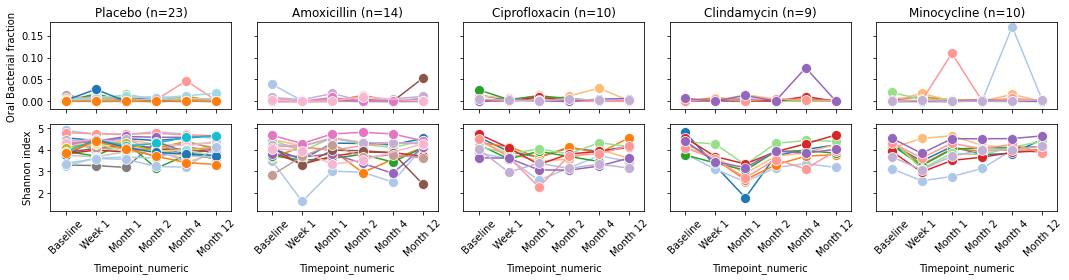

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,4), sharex=True, sharey='row')

for j,abx in enumerate(['Placebo','Amoxicillin','Ciprofloxacin','Clindamycin','Minocycline']):
    curr_df = df_meta_ext[df_meta_ext.Antibiotic==abx]
    subjects_order = list(set(curr_df.SubjectID))
    # plot oral fraction
    _ = sns.lineplot(x='Timepoint_numeric', y='OralFrac', data=curr_df, palette="tab20", marker='o', markersize=10, hue='SubjectID', ax=ax[0,j], hue_order=subjects_order)
    # plot shannon diversity
    _ = sns.lineplot(x='Timepoint_numeric', y='Shannon', data=curr_df, palette="tab20", marker='o', markersize=10, hue='SubjectID', ax=ax[1,j], hue_order=subjects_order)
    _ = ax[0,j].set_ylabel('Oral Bacterial fraction')
    _ = ax[1,j].set_ylabel('Shannon index')
    _ = ax[0,j].set_ylim([-0.018,0.18])
    _ = ax[1,j].set_ylim([1.2,5.2])
    _ = ax[0,j].set_title('%s (n=%d)' % (abx, len(subjects_order)))
    _ = ax[1,j].set_xlim([0.5,6.5])
    _ = ax[1,j].set_xticks([1,2,3,4,5,6])
    _ = ax[1,j].set_xticklabels([inv_timepoint_interpretation[k] for k in [1,2,3,4,5,6]], rotation=45)
    _ = ax[0,j].legend().remove()
    _ = ax[1,j].legend().remove()

plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig('oral_fraction_abx.svg', dpi=600, bbox_inches='tight')